To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.


2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.


3. In your chosen state, which of the lessons are the students more successful, math or reading?


4. What are the distributions of the math and reading scores in the sample?


5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

data = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [4]:
data.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492,1492,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
unique,1487,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,NaN,NaN,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,NaN,NaN,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,NaN,NaN,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,NaN,NaN,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121


- The primary key column, state, and year are considered in our descriptive statistics.
- There's a top value for primary key & state but none for any other columns
- Most numbers are large and are represented using scientific notation (would need a function to translate into integers).

2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

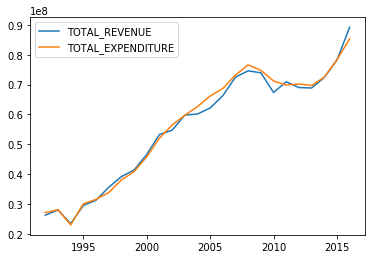

In [32]:
cali = data[data['STATE']=='CALIFORNIA']
plt.plot(cali['YEAR'],cali['TOTAL_REVENUE'])
plt.plot(cali['YEAR'],cali['TOTAL_EXPENDITURE'])
plt.legend()
plt.show()


The 2 variables evolve in the same fashion throughout the whole period mentioned in this dataset. Sometimes, especially between the year 2000 and 2010, expenditure surpassed revenue. This tells that California has had considerable education deficit in that period, but a closely-matching evolution between revenue and expenditures between 2010 and 2015 says that California has succeeded in minimizing the gap between the two.

3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [11]:
cali_math = (cali['AVG_MATH_4_SCORE'].mean()+cali['AVG_MATH_8_SCORE'].mean())/2
cali_read = (cali['AVG_READING_4_SCORE'].mean()+cali['AVG_READING_8_SCORE'].mean())/2
print ("math: "+ str(cali_math))
print ("reading: "+ str(cali_read))

math: 247.5074341007924
reading: 234.90709927713914


California students seem to be slightly better at math than reading.

4. What are the distributions of the math and reading scores in the sample?

(array([ 0.,  0.,  0.,  0.,  0., 26.,  0.,  0.,  0.,  0.]),
 array([5.06410747, 5.16410747, 5.26410747, 5.36410747, 5.46410747,
        5.56410747, 5.66410747, 5.76410747, 5.86410747, 5.96410747,
        6.06410747]),
 <a list of 10 Patch objects>)

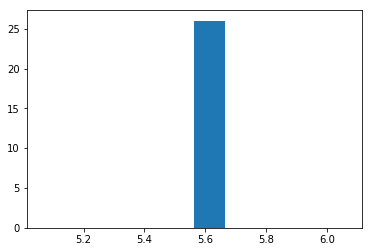

In [15]:
cali['AVG_MATH_8_SCORE'] = winsorize(cali['AVG_MATH_8_SCORE'],(0,0.97))



plt.hist(np.log(cali['AVG_MATH_8_SCORE']))

(array([2., 1., 0., 1., 1., 0., 2., 1., 0., 3.]),
 array([5.56410747, 5.56996778, 5.57582808, 5.58168839, 5.58754869,
        5.593409  , 5.5992693 , 5.6051296 , 5.61098991, 5.61685021,
        5.62271052]),
 <a list of 10 Patch objects>)

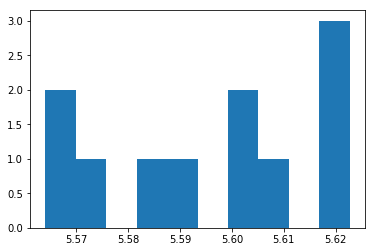

In [13]:
plt.hist(np.log(cali['AVG_MATH_8_SCORE']))

(array([2., 0., 1., 1., 1., 1., 2., 0., 0., 2.]),
 array([5.54085266, 5.54631191, 5.55177116, 5.5572304 , 5.56268965,
        5.5681489 , 5.57360814, 5.57906739, 5.58452663, 5.58998588,
        5.59544513]),
 <a list of 10 Patch objects>)

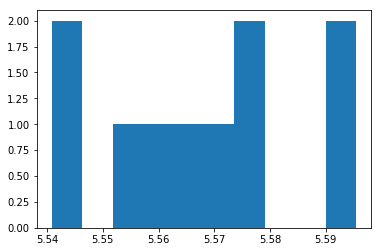

In [16]:
plt.hist(np.log(cali['AVG_READING_8_SCORE']))

5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [18]:
cali['AVG_MATH_8_SCORE'] = cali['AVG_MATH_8_SCORE'].fillna(cali['AVG_MATH_8_SCORE'].mean())
cali['AVG_READING_8_SCORE'] = cali['AVG_READING_8_SCORE'].fillna(cali['AVG_READING_8_SCORE'].mean())

(array([ 0.,  0.,  0.,  0.,  0., 26.,  0.,  0.,  0.,  0.]),
 array([5.06410747, 5.16410747, 5.26410747, 5.36410747, 5.46410747,
        5.56410747, 5.66410747, 5.76410747, 5.86410747, 5.96410747,
        6.06410747]),
 <a list of 10 Patch objects>)

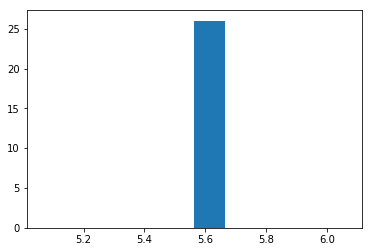

In [21]:
plt.hist(cali['AVG_MATH_8_SCORE'])

(array([ 2.,  0.,  1.,  1., 17.,  1.,  2.,  0.,  0.,  2.]),
 array([254.8952466 , 256.32546699, 257.75568738, 259.18590778,
        260.61612817, 262.04634857, 263.47656896, 264.90678935,
        266.33700975, 267.76723014, 269.19745054]),
 <a list of 10 Patch objects>)

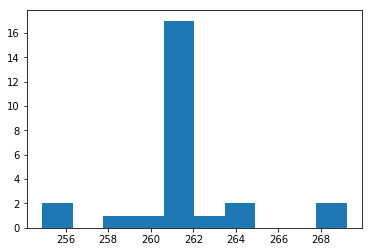

In [20]:
plt.hist(cali['AVG_READING_8_SCORE'])

In [23]:
cali['AVG_MATH_8_SCORE'] = cali['AVG_MATH_8_SCORE'].fillna(cali['AVG_MATH_8_SCORE'].mode())
cali['AVG_READING_8_SCORE'] = cali['AVG_READING_8_SCORE'].fillna(cali['AVG_READING_8_SCORE'].mode())

(array([2., 1., 0., 1., 1., 0., 2., 1., 0., 3.]),
 array([260.89224682, 262.46684215, 264.04143747, 265.61603279,
        267.19062812, 268.76522344, 270.33981877, 271.91441409,
        273.48900942, 275.06360474, 276.63820006]),
 <a list of 10 Patch objects>)

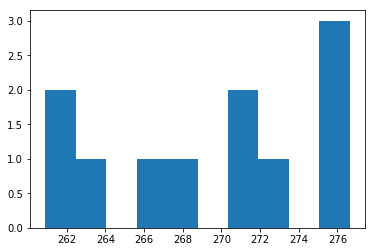

In [24]:
plt.hist(cali['AVG_MATH_8_SCORE'])

(array([2., 0., 1., 1., 2., 1., 2., 0., 0., 2.]),
 array([254.8952466 , 256.32546699, 257.75568738, 259.18590778,
        260.61612817, 262.04634857, 263.47656896, 264.90678935,
        266.33700975, 267.76723014, 269.19745054]),
 <a list of 10 Patch objects>)

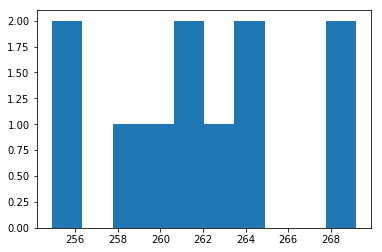

In [25]:
plt.hist(cali['AVG_READING_8_SCORE'])

In [29]:
cali['AVG_MATH_8_SCORE'] = cali['AVG_MATH_8_SCORE'].fillna(cali['AVG_MATH_8_SCORE'].median())
cali['AVG_READING_8_SCORE'] = cali['AVG_READING_8_SCORE'].fillna(cali['AVG_READING_8_SCORE'].median())

(array([ 2.,  1.,  0.,  1.,  1.,  0., 17.,  1.,  0.,  3.]),
 array([260.89224682, 262.46684215, 264.04143747, 265.61603279,
        267.19062812, 268.76522344, 270.33981877, 271.91441409,
        273.48900942, 275.06360474, 276.63820006]),
 <a list of 10 Patch objects>)

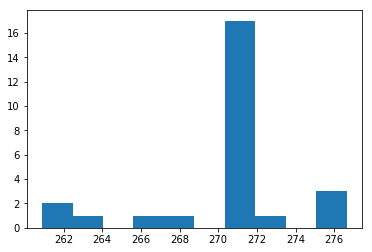

In [30]:
plt.hist(cali['AVG_MATH_8_SCORE'])

(array([ 2.,  0.,  1.,  1., 17.,  1.,  2.,  0.,  0.,  2.]),
 array([254.8952466 , 256.32546699, 257.75568738, 259.18590778,
        260.61612817, 262.04634857, 263.47656896, 264.90678935,
        266.33700975, 267.76723014, 269.19745054]),
 <a list of 10 Patch objects>)

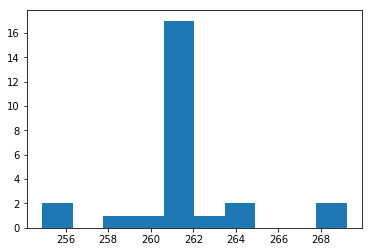

In [31]:
plt.hist(cali['AVG_READING_8_SCORE'])

In [34]:
cali['AVG_MATH_8_SCORE'] = cali['AVG_MATH_8_SCORE'].interpolate(method='nearest')
cali['AVG_READING_8_SCORE'] = cali['AVG_READING_8_SCORE'].interpolate(method='nearest')

(array([6., 4., 0., 3., 2., 0., 4., 2., 0., 5.]),
 array([260.89224682, 262.46684215, 264.04143747, 265.61603279,
        267.19062812, 268.76522344, 270.33981877, 271.91441409,
        273.48900942, 275.06360474, 276.63820006]),
 <a list of 10 Patch objects>)

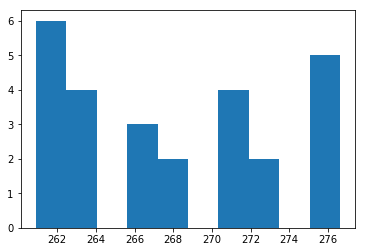

In [35]:
plt.hist(cali['AVG_MATH_8_SCORE'])

(array([5., 0., 2., 2., 2., 1., 5., 0., 0., 5.]),
 array([254.8952466 , 256.32546699, 257.75568738, 259.18590778,
        260.61612817, 262.04634857, 263.47656896, 264.90678935,
        266.33700975, 267.76723014, 269.19745054]),
 <a list of 10 Patch objects>)

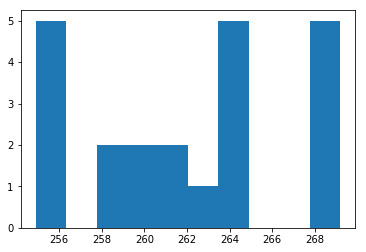

In [36]:
plt.hist(cali['AVG_READING_8_SCORE'])

Filling missing values with the mean did not lead to a more normal distribution of the data, epecially for math grades, and neither did filling null values in with the mode. The median performed slightly better, and the reason may be that missing values were actually from the the middle of the data.

Since interpolation applied the method where values were filled from the nearest values, it did not change much in the distribution of the data either.